# Fitting Models Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

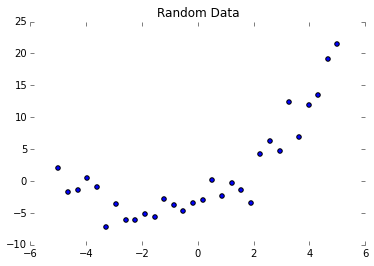

In [27]:
# YOUR CODE HERE
#raise NotImplementedError()
x = np.linspace(-5,5,30)
dy = 2.0
np.random.seed(0)
y = a_true*x**2 + b_true*x + c_true + np.random.normal(0.0, dy, size = 30)
plt.scatter(x,y)
plt.title('Random Data')
plt.box(False);

In [28]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

a = 0.582 +/- 0.046
b = 1.845 +/- 0.122
c = -3.843 +/- 0.548


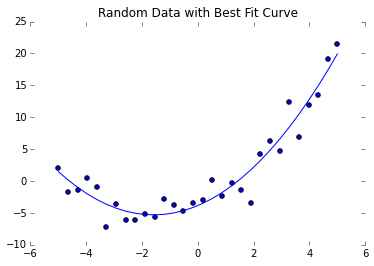

In [38]:
# YOUR CODE HERE
#raise NotImplementedError()
def chi2(theta, x, y, dy):
    #theta = [a,b,c]
    return np.sum(((y - theta[0]*(x**2) - theta[1]*x - theta[2])/dy)**2)

guess = [0.4, 2.5, -3.8]
sol = opt.minimize(chi2, guess, args=(x,y,dy))
bestfit = sol.x

def uncert(theta, x, y, dy):
    return (y - theta[0]*(x**2) - theta[1]*x - theta[2])/dy

deviation = opt.leastsq(uncert, guess, args=(x, y, dy), full_output=True)

best = deviation[0]
best_div = deviation[1]

print('a = {0:.3f} +/- {1:.3f}'.format(best[0], np.sqrt(best_div[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(best[1], np.sqrt(best_div[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(best[2], np.sqrt(best_div[2,2])))

yfit = bestfit[0]*(x**2) + bestfit[1]*x + bestfit[2]
plt.plot(x,yfit)
plt.scatter(x,y)
plt.title('Random Data with Best Fit Curve')
plt.box(False);


In [6]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors